In [1]:
import pandas as pd
df = pd.read_csv('/content/heart.csv')

In [ ]:
'''
Attribute explanation :

1. cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
2. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
3. chol: serum cholestoral in mg/dl
4. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
5. restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
6. thalach: maximum heart rate achie
7. exang: exercise induced angina (1 = yes; 0 = no)
8. oldpeak = ST depression induced by exercise relative to rest
9.  slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
10. ca: number of major vessels (0-3) colored by flourosopy
11. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

'''

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [4]:
df.shape

(303, 14)

The below cell will return true if any of the column has null values, else false

In [15]:
df.isnull().values.any()

False

Another way of checking total null values in a column.

In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Creating a correlation matrix.

In [18]:
import seaborn as sns
cor_mat = df.corr()

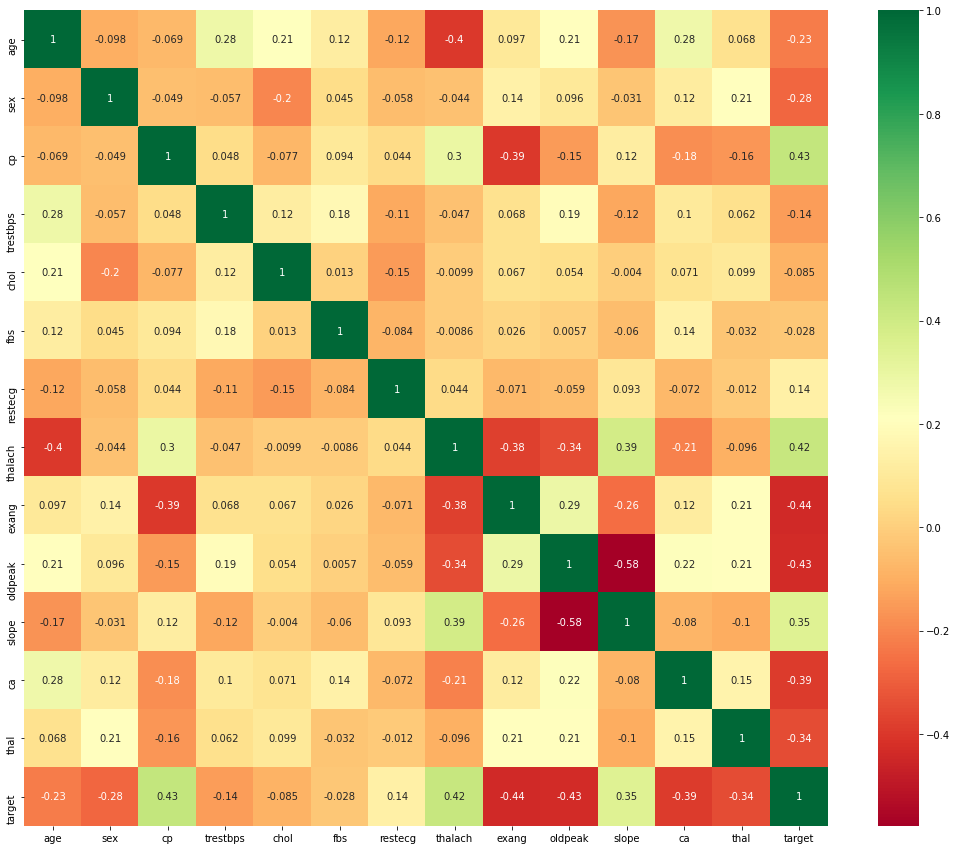

In [26]:
import matplotlib.pyplot as plt
s = plt
plt.figure(figsize = (18,15))
g=sns.heatmap(cor_mat,annot=True,cmap="RdYlGn")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff92ee30290>,
      dtype=object)

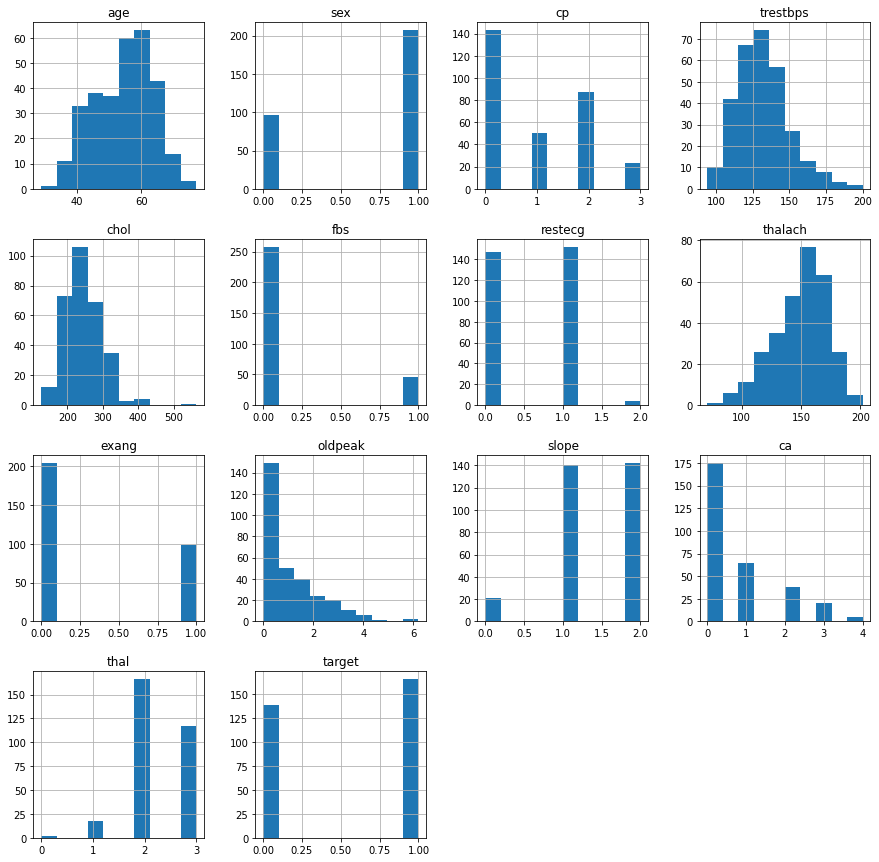

In [29]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax)

Checking if our dataset is imbalanced.

In [30]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Visually checkng if dataset is imbalanced? Use either of two.

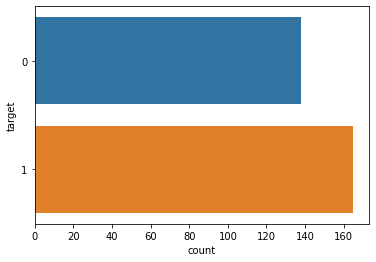

In [31]:
sns.countplot(y = df['target'])

Creating list of columns which are categorical, we need to create dummies variable for this. Even though here categories are numerical not changing them in dummy variables might affect model performance as it may assume that value have some priotity or significance.

In [32]:
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

After dummy variables

In [33]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


Now creating a list if elements that needs to be scaled and scaling them.

In [34]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [35]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [37]:
y = df['target']
X = df.drop('target', axis = 1)

###KNN Classifier

The below code checks for 1 to 25 diffrennt neighbours and calculate the scores for diffrent neighbours, later we will use this score to choose the most apropiate number of neighbours for our classifier.

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,25):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [51]:
knn_scores

[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601,
 0.8349462365591398,
 0.828494623655914,
 0.8283870967741935,
 0.828494623655914]

Printing max score that we got.

In [52]:
print(max(knn_scores))

0.8449462365591398


In [ ]:
Finding out for how many neighnours, the score came out to be maximum.

In [56]:
for i in range(0, len(knn_scores)):
  if(knn_scores[i] == max(knn_scores)):
    n = i
    break
n = n + 1#cause index start from 0, but index 0 respresent 1 neighnour, index 1 represent 2 neigbours and so on.
print(n) #thus with 'n' neighbours we got highest cross validation score.

9


Plotting variation of score vs number of neighbours.

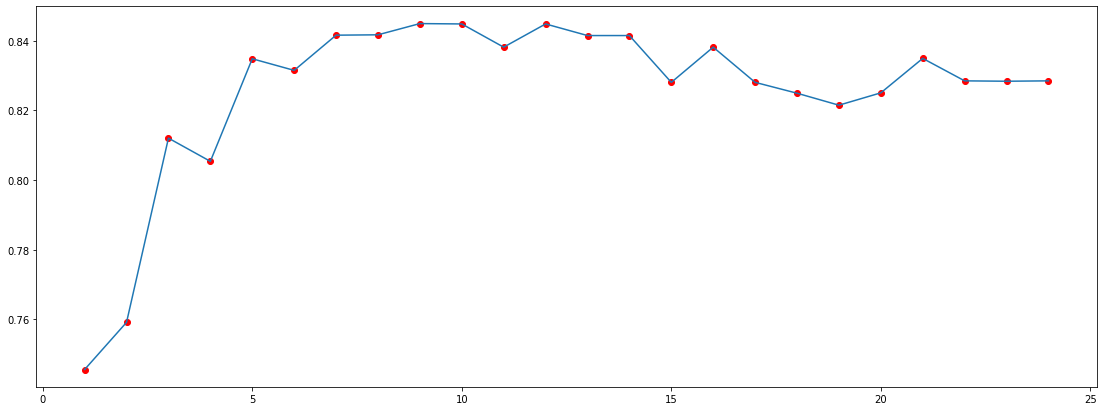

In [75]:
import numpy as np

knn_n = np.arange(len(knn_scores))
knn_n = list(knn_n)
for i in range(len(knn_n)):
  knn_n[i] = knn_n[i] + 1

plt.figure(figsize = (19,7))
plt.scatter(knn_n, knn_scores, color = 'red')
plt.plot(knn_n, knn_scores)


In [121]:
knn_classifier = KNeighborsClassifier(n_neighbors = n)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [122]:
score.mean()

0.8449462365591398

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [124]:
print(X_train.shape, X_test.shape)

(203, 30) (100, 30)


In [125]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [126]:
y_pred = knn_classifier.predict(X_test)

In [127]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)

In [129]:
cm

array([[36,  6],
       [ 8, 50]])

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.89      0.86      0.88        58

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [131]:
type(y_pred_rf)

numpy.ndarray

In [95]:
accuracy_score

0.84

###Random Forest

Now we will use Random Forest to classify and analyze it's performance.

In [101]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score_rf = cross_val_score(randomforest_classifier,X,y,cv=10)

In [103]:
score_rf.mean()

0.8248387096774193

In [113]:
randomforest_classifier.fit(X_train, y_train)
y_pred_rf = randomforest_classifier.predict(X_test)

In [114]:
y_pred_rf

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [107]:
cm_rf = confusion_matrix(y_test, y_pred)

In [108]:
cm_rf

array([[35,  7],
       [ 9, 49]])

In [120]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80        42
           1       0.87      0.81      0.84        58

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100

